In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
froot = r'D:\steaime\Documents\Research\Chiara\Data\PIV analysis\230710\0.010s-1'
sub_list = ['-78.045', '-78.145', '-78.245', '-78.345', '-78.445']
plot_subfolder = 'track_plots'
framerate = 0.005 #s
px_size = 1./0.7 #um
frame_range = [50, 9950] 

In [35]:
cur_subfolder = sub_list[-1]
data_test = pd.read_csv(os.path.join(froot, cur_subfolder, 'tracks.csv'), sep='\t')
data_test.head()

,idx,y,x,frame,particle
0,0,198.856929,30.664008,0,437
1,1,5.612758,87.446521,0,582
2,2,43.998950,128.976207,0,625
3,3,35.663457,110.802600,0,645
4,4,170.105665,244.224061,0,668


In [36]:
data_test.query('frame == 1000').head()

,idx,y,x,frame,particle
34181,34181,246.877689,38.006761,1000,426325
34182,34182,253.400582,5.157129,1000,477843
34183,34183,268.716667,80.098958,1000,461487
34184,34184,204.731114,43.842510,1000,461086
34185,34185,209.772908,6.919655,1000,467997


particle 426325 has been tracked for 186 frames


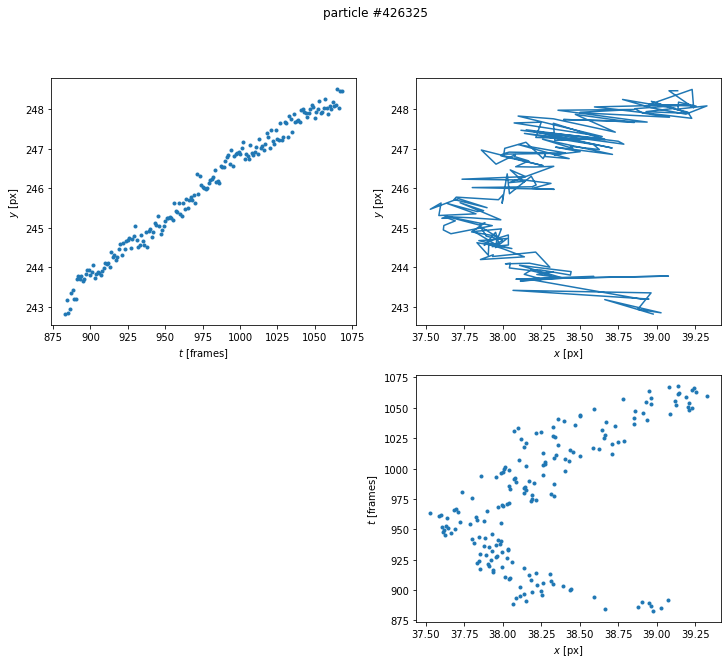

In [45]:
def gen_track_plot(part_id, save_fname=None):
    single_particle = data_test.loc[data_test['particle'] == part_id]
    print('particle {0} has been tracked for {1} frames'.format(part_id, len(single_particle)))
    if len(single_particle)>1:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        ax[0,0].plot(single_particle['frame'], single_particle['y'], '.')
        ax[0,1].plot(single_particle['x'], single_particle['y'])
        ax[1,1].plot(single_particle['x'], single_particle['frame'], '.')
        ax[1,0].set_axis_off()
        for cax in ax[:,1]:
            cax.set_xlabel(r'$x$ [px]')
        for cax in ax[0]:
            cax.set_ylabel(r'$y$ [px]')
        ax[0,0].set_xlabel(r'$t$ [frames]')
        ax[1,1].set_ylabel(r'$t$ [frames]')
        fig.suptitle('particle #'+str(part_id))
        if save_fname is not None:
            if save_fname=='auto':
                save_fname = os.path.join(os.path.join(froot, cur_subfolder, plot_subfolder, str(part_id)+'.png'))
            fig.savefig(save_fname)

gen_track_plot(426325, save_fname='auto')

In [44]:
filter_frame = data_test.query('frame == 1000')
for i in range(len(filter_frame)):
    gen_track_plot(filter_frame.iloc[i]['particle'], save_fname='auto')
    plt.close('all')

particle 426325.0 has been tracked for 186 frames
particle 477843.0 has been tracked for 106 frames
particle 461487.0 has been tracked for 55 frames
particle 461086.0 has been tracked for 60 frames
particle 467997.0 has been tracked for 52 frames
particle 477890.0 has been tracked for 71 frames
particle 465702.0 has been tracked for 91 frames
particle 458839.0 has been tracked for 75 frames
particle 467993.0 has been tracked for 53 frames
particle 457949.0 has been tracked for 68 frames
particle 468757.0 has been tracked for 51 frames
particle 428841.0 has been tracked for 151 frames
particle 451687.0 has been tracked for 68 frames
particle 479473.0 has been tracked for 113 frames
particle 462697.0 has been tracked for 162 frames
particle 448564.0 has been tracked for 99 frames
particle 453975.0 has been tracked for 71 frames
particle 475657.0 has been tracked for 84 frames
particle 454448.0 has been tracked for 76 frames
particle 466410.0 has been tracked for 61 frames
particle 460869

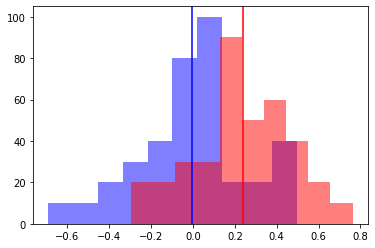

In [89]:
t0 = 1000
nframes = 10
tau=10

def extract_displ(data, t0, tau, nframes):
    all_dx, all_dy = [], []
    for t in range(t0, t0+nframes):
        data_frame1 = data.query('frame == '+str(t0))
        data_frame2 = data.query('frame == '+str(t0+tau))
        for i in range(len(data_frame1)):
            part = data_frame2.loc[data_frame2['particle'] == data_frame1.iloc[i]['particle']]
            if len(part)>0:
                all_dx.append(float(part['x'] - data_frame1.iloc[i]['x']))
                all_dy.append(float(part['y'] - data_frame1.iloc[i]['y']))
    return all_dx, all_dy

test_dx, test_dy = extract_displ(data_test, t0, tau, nframes)
fig, ax = plt.subplots()
_ = ax.hist(test_dx, color='b', alpha=0.5)
_ = ax.hist(test_dy, color='r', alpha=0.5)
ax.axvline(np.mean(test_dx), color='b')
ax.axvline(np.mean(test_dy), color='r')

C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


(array([-0.00348245]), array([0.02852735]))

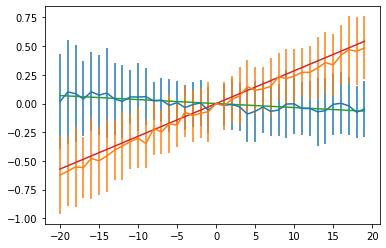

In [104]:
def get_speed(data, t0, max_tau, nframes, plot=False):

    tau_list = list(range(-max_tau, max_tau))
    mean_dx, mean_dy, err_dx, err_dy = [], [], [], []
    fit_tau = []
    for cur_tau in tau_list:
        if t0+cur_tau >= frame_range[0] and t0+cur_tau < frame_range[1]:
            fit_tau.append(cur_tau)
            cur_dx, cur_dy = extract_displ(data, t0, cur_tau, nframes)
            mean_dx.append(np.mean(cur_dx))
            mean_dy.append(np.mean(cur_dy))
            err_dx.append(np.std(cur_dx))
            err_dy.append(np.std(cur_dy))

    vx = np.linalg.lstsq(np.asarray(fit_tau)[:,np.newaxis], np.asarray(mean_dx))[0]
    vy = np.linalg.lstsq(np.asarray(fit_tau)[:,np.newaxis], np.asarray(mean_dy))[0]
    
    if plot:
        plt.errorbar(fit_tau, mean_dx, err_dx)
        plt.errorbar(fit_tau, mean_dy, err_dy)
        plt.plot(fit_tau, fit_tau*vx)
        plt.plot(fit_tau, fit_tau*vy)
              
    return vx, vy

get_speed(1000, 20, 10, plot=True)

In [ ]:
t0_list = list(range(100, 9900, 100))
max_tau = 20
all_vx, all_vy = [], []
for cur_t in t0_list:
    cur_vx, cur_vy = get_speed(data, cur_t, max_tau, nframes, plot=False)
    all_vx.append(cur_vx)
    all_vy.append(cur_vy)

plt.plot(t0_list, all_vx)
plt.plot(t0_list, all_vy)

C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


In [ ]:
def get_all_speeds(data, start_t, end_t, t_step, max_tau, avg_nframes):
    
    t0_list = list(range(start_t, end_t, t_step))
    max_tau = 20
    all_vx, all_vy = [], []
    for cur_t in t0_list:
        cur_vx, cur_vy = get_speed(data, cur_t, max_tau, avg_nframes, plot=False)
        all_vx.append(cur_vx)
        all_vy.append(cur_vy)
        
    return all_vx, all_vy, t0_list

test_vx, test_vy, test_t0 = get_all_speeds(data_test, 100, 9900, 100, max_tau, nframes)
plt.plot(test_t0, test_vx)
plt.plot(test_t0, test_vy)

In [ ]:
start_t = 100
end_t = 9900
t_step = 100

all_vx, all_vy = [list(range(start_t, end_t, t_step))], [list(range(start_t, end_t, t_step))]
save_hdr = 't0[frames]'
for s in sub_list:
    cur_data = pd.read_csv(os.path.join(froot, s, 'tracks.csv'), sep='\t')
    cur_vx, cur_vy, cur_t0 = get_all_speeds(cur_data, start_t, end_t, t_step, max_tau, nframes)
    all_vx.append(cur_vx)
    all_vy.append(cur_vy)
    save_hdr += '\t'+s
    
np.savetxt(os.path.join(froot, 'Tracking_vx.dat'), np.asarray(all_vx).T, delimiter='\t', header=save_hdr)
np.savetxt(os.path.join(froot, 'Tracking_vy.dat'), np.asarray(all_vy).T, delimiter='\t', header=save_hdr)

In [ ]:
plt.imshow(cur_vy[1:], aspect='auto')

Fit for instantaneous speed

In [9]:
v_avg = 100
speeds = []
fit_x = np.arange(1,21)[:,np.newaxis]
for s in sub_list:
    cur_d = np.loadtxt(os.path.join(froot, s, 'dy_results.txt'), skiprows=1, max_rows=9900)
    cur_vel = []
    for t in range(0,cur_d.shape[0],v_avg):
        fit_y = []
        for i in range(1,40,2):
            fit_y.append(np.mean(cur_d[t:t+v_avg,i]))
        a, _, _, _ = np.linalg.lstsq(fit_x, np.asarray(fit_y))
        cur_vel.append(a*px_size/framerate)
    speeds.append(cur_vel)
speeds = np.squeeze(np.asarray(speeds))

C:\Users\steaime\miniconda3\envs\DSH\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


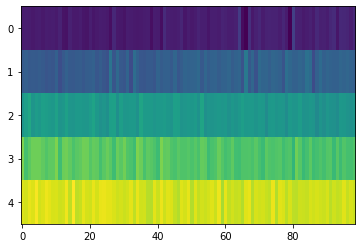

In [26]:
plt.imshow(speeds, aspect='auto')
np.savetxt(os.path.join(froot, 'PIV_speeds.dat'), speeds.T, delimiter='\t')

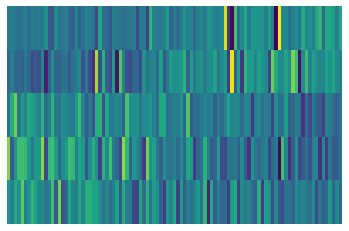

In [29]:
speed_fluct = np.empty_like(speeds)
for i in range(speeds.shape[0]):
    speed_fluct[i] = speeds[i]-np.mean(speeds[i])
fig, ax = plt.subplots()
ax.imshow(speed_fluct, aspect='auto', interpolation='none')
#plt.colorbar()
plt.axis('off')
fig.savefig(os.path.join(froot, 'speed_fluct.png'))

0.7347531438654884
2.5955007475905476
4.5081321194229504
6.206289365389391
7.877137011347552


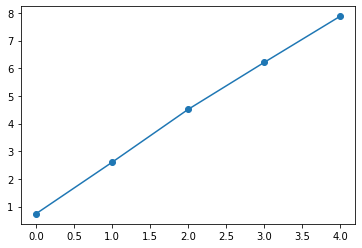

In [25]:
mean_speed = np.mean(speeds, axis=1)
plt.plot(mean_speed, 'o-')
for v in mean_speed:
    print(v)